In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns 
import matplotlib.pyplot as plt 
import random
plt.style.use('ggplot')
random.seed(100)

Matplotlib is building the font cache; this may take a moment.


# Read data
The dataset we will use in this project will be a mobile price dataset from kaggle. This project aims to using statistical and machine learning methods to explain and predict mobile prices based on mobile phone features.

Data Sources: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

Please make sure that you read full description of the data prior to working on this project.

In [2]:
# Read data
train = pd.read_csv("./train.csv")
test = pd.read_csv('./test.csv')
print(train.shape)
print(test.shape)

(2000, 21)
(1000, 21)


# Exploratory data analysis

In [3]:
# print the first 5 rows of the training dataset to get an idea of how the data looks like
# Check https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Check the data types of each variable
# Check https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
# Check how many missing values there're for each variable
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
train.isna().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# Get descriptive statistics of the input variables
train.describe().T
#see if there is any odd data

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [10]:
# Check the distribution of our target variable (price_range)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
train['price_range'].value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

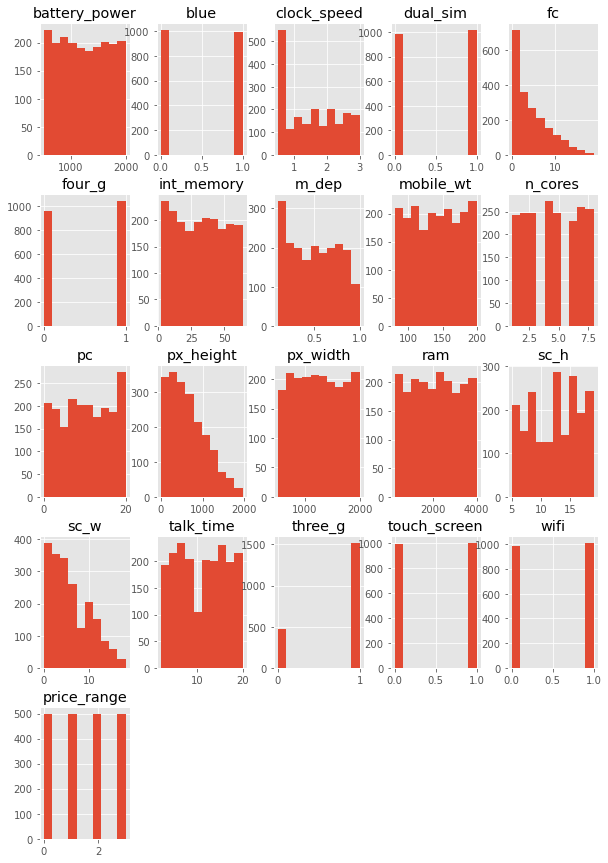

In [15]:
# plot the distribution of explanatory variables
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
#see if there are any outliers
train.hist(figsize=(10,15))
plt.show()

In [16]:
# Check the correlation between explanatory variables
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


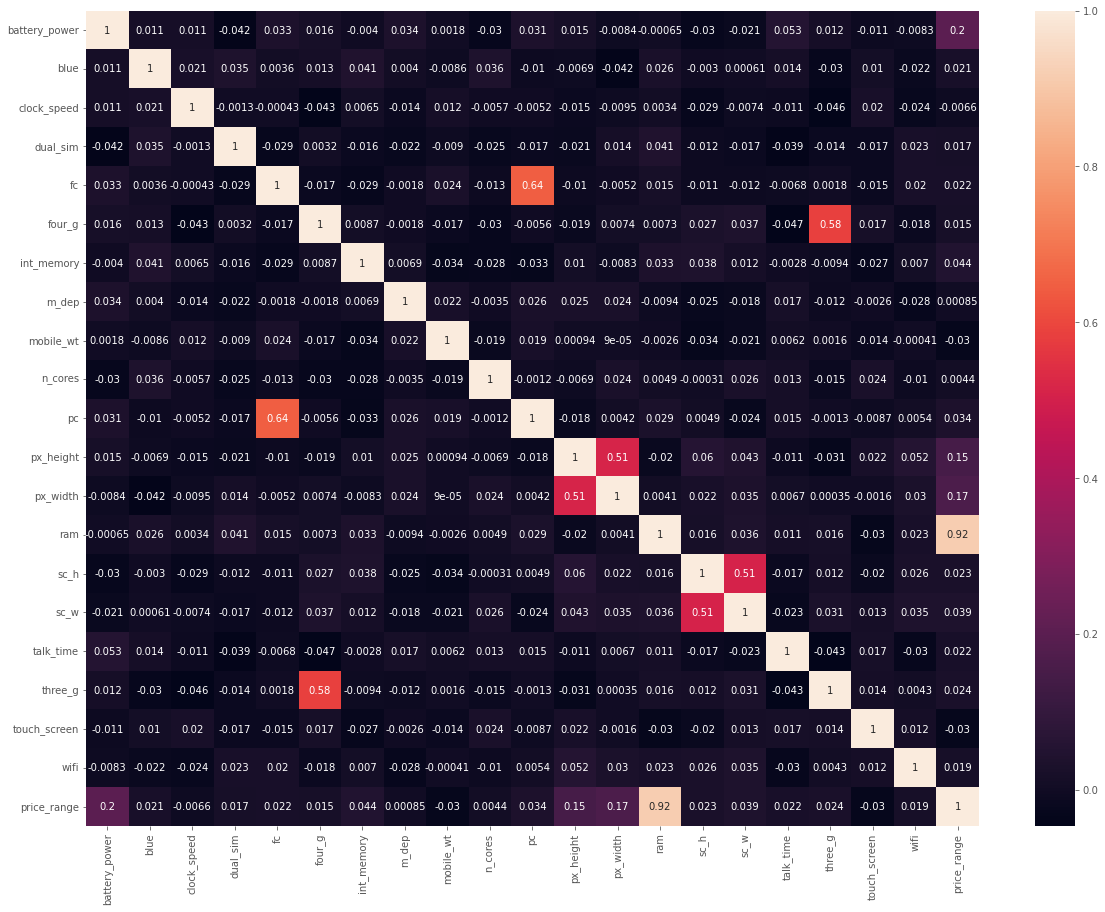

In [17]:
# plot a heatmap of the correlation table
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(train.corr(),annot=True)


<AxesSubplot:xlabel='price_range'>

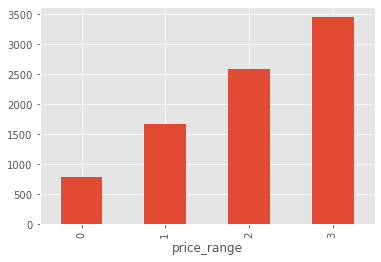

In [18]:
# Select a few variables with high correlation with our target variable. Plot against the target variable.
# Rule of thumb of type plots to use:
# discrete vs discrete variable: table https://pbpython.com/pandas-crosstab.html
# discrete vs continuous variable: bar plot https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# countinuous vs countinuous variable: scatter https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.htmlplot

train.groupby(['price_range']).mean()['ram'].plot.bar()


<AxesSubplot:xlabel='price_range'>

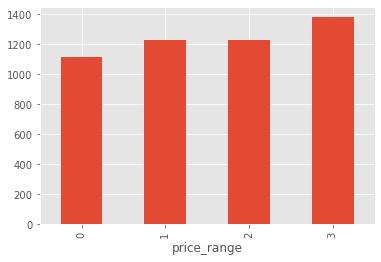

In [19]:
train.groupby(['price_range']).mean()['battery_power'].plot.bar()

In [ ]:
# Check to see if you have any concerns on the data quality. If not, move to the modeling step

# Modeling
At this step we will run some models to generate insights of main drivers to mobile price. Since we're doing multi-class classification task here, the coefficient is for regression models is not as intuitive as tree-based models. However, it can be a good benchmark for model performance. To avoid overfitting, we will use a 5-fold cross validation to train the model.

In [22]:
# First, we will get a table X_train which contains only the explanatory variables and 
#  y_train which contains only the target variable
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
X_train = train.drop(['price_range'], axis=1)
y_train = train['price_range']

In [25]:
# Helper function for k-fold classification
# This function will plot the classification report for each fold. For detailed explanation of each metric, please review:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
def stratified_k_fold_cv(model, X, y, k, model_name):
    skf = StratifiedKFold(n_splits=k)
    y_train_all, y_test_all, pred_train_all, pred_test_all, cm_train, cm_test, coef=[], [], [], [], [], [], []
    i = 1
    for train_index, test_index in skf.split(X, y):
        print("Start Fold {}:".format(i))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        y_train_all.append(y_train)
        y_test_all.append(y_test)
        
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        cm_train.append(confusion_matrix(y_train, train_pred))
        cm_test.append(confusion_matrix(y_test, test_pred))
        pred_train_all.append(train_pred)
        pred_test_all.append(test_pred)
        print("Training Classification Report:")
        print(classification_report(y_train, train_pred))
        print("Testing Classification Report:")
        print(classification_report(y_test, test_pred))
        
        if model_name == 'LR':
            coef.append(pd.DataFrame(model.coef_.T, index=X.columns, columns=['C1', 'C2', 'C3', 'C4']))
        elif model_name == 'GB':
            coef.append(pd.DataFrame(np.array([X.columns.values, model.feature_importances_]).T, columns=['Var', 'Importance']).sort_values(by='Importance', ascending=False))
        
        i += 1
    
    
    return y_train_all, y_test_all, pred_train_all, pred_test_all, cm_train, cm_test, coef
        
        

## Logistic Regression

In [ ]:
# This is written for you as a reference of how to fit a model with scikit-learn. Try to understand how this works and
#  fit a gradient boosting model by yourself

In [27]:
# Fit a lasso model. Use 'l1' penalization
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
y_train_all_lr, y_test_all_lr, pred_train_all_lr, pred_test_all_lr, cm_train_lr, cm_test_lr, coef_lr = \
    stratified_k_fold_cv(model=clf, X=X_train, y=y_train, k=5, model_name='LR')

Start Fold 1:
Training Classification Report:


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       400
           1       0.55      0.55      0.55       400
           2       0.50      0.46      0.48       400
           3       0.67      0.76      0.71       400

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.55      0.58      0.57       100
           2       0.44      0.43      0.44       100
           3       0.69      0.67      0.68       100

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.63      0.63      0.63       400

Start Fold 2:
Training Classification Report:
              precision    recall  f1-score   support

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       400
           1       0.55      0.54      0.54       400
           2       0.50      0.47      0.49       400
           3       0.67      0.74      0.70       400

    accuracy                           0.63      1600
   macro avg       0.63      0.63      0.63      1600
weighted avg       0.63      0.63      0.63      1600

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.59      0.51      0.55       100
           2       0.47      0.42      0.44       100
           3       0.65      0.79      0.71       100

    accuracy                           0.64       400
   macro avg       0.63      0.64      0.64       400
weighted avg       0.63      0.64      0.64       400

Start Fold 4:
Training Classification Report:
              precisi

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Print the coefficient
for c in coef_lr:
    display(c)

,C1,C2,C3,C4
battery_power,-0.000747,0.000082,0.000326,0.000338
blue,0.000285,0.000143,-0.000047,-0.000381
clock_speed,0.000993,0.000152,-0.000100,-0.001044
dual_sim,0.000310,0.000239,-0.000214,-0.000335
fc,0.001760,0.000382,0.001079,-0.003221
four_g,0.000295,0.000156,-0.000250,-0.000201
int_memory,0.018383,0.006103,-0.009732,-0.014753
m_dep,0.000232,0.000159,-0.000081,-0.000310
mobile_wt,0.051623,0.014250,-0.016311,-0.049562
n_cores,0.003420,-0.000417,0.000315,-0.003319


,C1,C2,C3,C4
battery_power,-0.000641,0.000210,0.000161,0.000270
blue,0.000290,0.000182,-0.000117,-0.000355
clock_speed,0.000939,0.000280,-0.000150,-0.001069
dual_sim,0.000366,0.000113,-0.000152,-0.000327
fc,0.001674,0.001334,-0.000129,-0.002879
four_g,0.000283,0.000126,-0.000133,-0.000276
int_memory,0.014225,0.007636,-0.007635,-0.014226
m_dep,0.000225,0.000168,-0.000092,-0.000300
mobile_wt,0.051741,0.012796,-0.013001,-0.051537
n_cores,0.003228,-0.000360,0.000202,-0.003070


,C1,C2,C3,C4
battery_power,-0.000609,0.000105,2.672524e-04,0.000238
blue,0.000256,0.000084,-1.130955e-04,-0.000227
clock_speed,0.000842,0.000038,5.456460e-08,-0.000879
dual_sim,0.000290,0.000099,-9.677679e-05,-0.000292
fc,0.001102,0.001281,-2.453633e-04,-0.002138
four_g,0.000304,0.000066,-1.734760e-04,-0.000197
int_memory,0.013480,0.005540,-7.152718e-03,-0.011867
m_dep,0.000211,0.000145,-8.542378e-05,-0.000270
mobile_wt,0.046527,0.015091,-1.313761e-02,-0.048480
n_cores,0.002628,0.000057,2.770153e-04,-0.002962


,C1,C2,C3,C4
battery_power,-0.000620,0.000079,0.000232,0.000309
blue,0.000311,0.000035,-0.000101,-0.000245
clock_speed,0.000853,0.000059,-0.000043,-0.000870
dual_sim,0.000267,0.000122,-0.000069,-0.000320
fc,0.001773,0.000293,0.000245,-0.002311
four_g,0.000198,0.000115,-0.000155,-0.000159
int_memory,0.012727,0.005148,-0.006432,-0.011443
m_dep,0.000181,0.000139,-0.000064,-0.000256
mobile_wt,0.047849,0.015331,-0.013426,-0.049754
n_cores,0.002598,-0.000068,0.000207,-0.002736


,C1,C2,C3,C4
battery_power,-0.000581,0.000011,2.272739e-04,0.000342
blue,0.000235,0.000061,2.620771e-05,-0.000322
clock_speed,0.001000,-0.000006,-1.685478e-04,-0.000826
dual_sim,0.000256,0.000134,-8.698981e-05,-0.000303
fc,0.001210,0.001515,2.300453e-04,-0.002954
four_g,0.000314,0.000050,-1.756916e-04,-0.000188
int_memory,0.014145,0.006389,-5.858425e-03,-0.014676
m_dep,0.000195,0.000160,-1.067534e-04,-0.000248
mobile_wt,0.049156,0.015649,-1.583225e-02,-0.048974
n_cores,0.002780,-0.000231,4.098705e-04,-0.002958


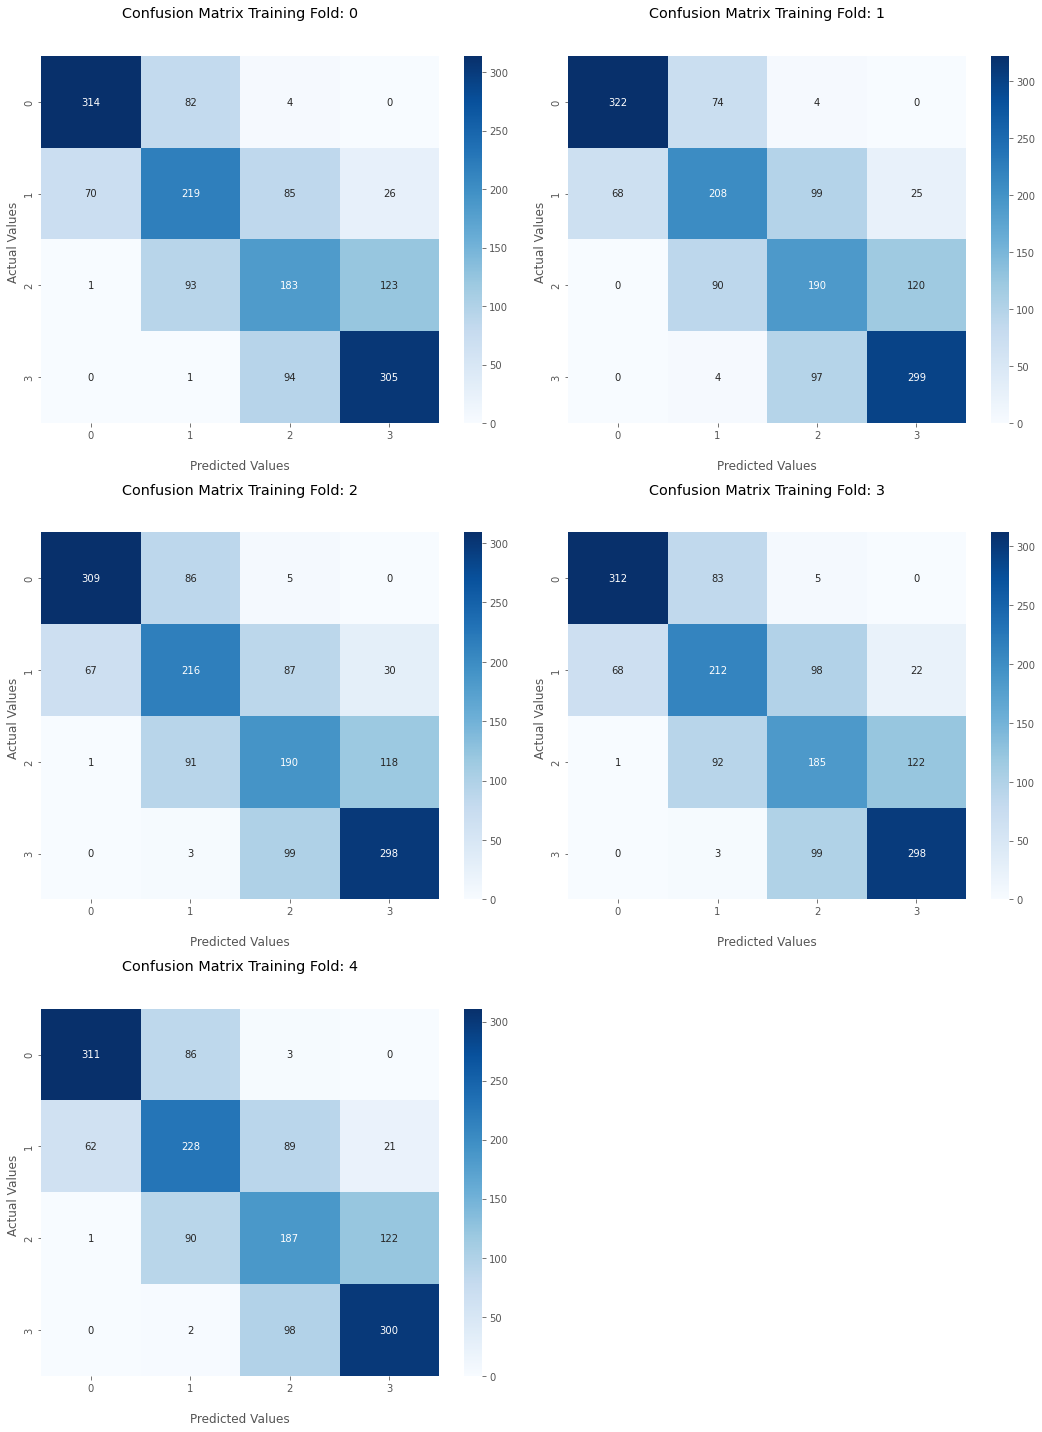

In [30]:
# Plot an confusion matrix for each training fold
f, axes = plt.subplots(3,2, figsize=(15, 20))

for i, cm in enumerate(cm_train_lr):
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=axes[i//2][i%2])

    ax.set_title('Confusion Matrix Training Fold: {}\n\n'.format(i));
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels([0, 1, 2, 3])
    ax.yaxis.set_ticklabels([0, 1, 2, 3])

axes[2][1].set_visible(False)
plt.tight_layout()

# Gradient Boosting

In [ ]:
# Fit a gradient boosting model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# When define the model, set n_estimators to 300, learning_rate to 0.01
# Set model_name to 'GB'


In [ ]:
# Check variable importance


In [ ]:
# Plot confusion matrix

# Prediction

In [ ]:
# In this step, refit the model with all the data (no cross validation needed) and do a prediction on the test data

# Analysis

In [ ]:
#summary:
# Make analysis based on model outputs. How is the model performance? 
# What can you tell based on the variable importance of gradient boosting model? 
# What are the main drivers of mobile price?
# What recommendation would you give to Bob?

In [ ]:
summary: